# Clusters

## Loading Modules, Data and Model

In [97]:
import pickle as pkl

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from collections import Counter
from pathlib import Path

from gensim.models.doc2vec import Doc2Vec
from hdbscan import HDBSCAN
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import TruncatedSVD 
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
from sklearn.metrics import pairwise_distances

plt.rcParams["figure.figsize"] = [10.50, 6.50]
plt.rcParams["figure.autolayout"] = True

In [2]:
data_dir = Path(Path.cwd().parent, 'data/interim')
models_dir = Path(Path.cwd().parent, 'src/models')

In [3]:
with open(Path(data_dir, 'tagged_docs_42_1e4.pkl'), 'rb') as handle:
    corpus = pkl.load(handle)

In [4]:
model = Doc2Vec.load(str(Path(models_dir, "dv.model_300_15_1_20_1e-5")))

## Nearest Neighbours estimation

In [11]:
X = model.dv.vectors

In [16]:
# Min_samples set to ln(number of points)
number_rows = len(corpus)
min_samples_set = int(np.ceil(np.log(number_rows)))
nbrs = NearestNeighbors(n_neighbors=min_samples_set).fit(X)
distances, indices = nbrs.kneighbors(X)
distanceDec = sorted(distances[:, min_samples_set-1], reverse=True)
plt.plot(list(range(1,number_rows + 1)), distanceDec)
plt.title('Min samples set to ln(number of points)')
plt.show()

## KMeans Baseline

In [53]:
km_eval = {}
for i in range(3,21):
    km = KMeans(n_clusters= i)
    km.fit(X)
    clusters = km.labels_.tolist()
    sil_score = metrics.silhouette_score(X, clusters, metric='euclidean')
    km_eval[i] = sil_score
    print(f'Clusters: {str(i)} Score: {sil_score}')
best_cluster = max(km_eval, key=km_eval.get)
print(f'Best fitted number of clusters: {best_cluster}')

Clusters: 3 Score: 0.07876726984977722
Clusters: 4 Score: 0.040985677391290665
Clusters: 5 Score: 0.013933755457401276
Clusters: 6 Score: 0.012082528322935104
Clusters: 7 Score: -0.04299357160925865
Clusters: 8 Score: -0.045189715921878815
Clusters: 9 Score: -0.04284580424427986
Clusters: 10 Score: -0.0610097236931324
Clusters: 11 Score: -0.05340707302093506
Clusters: 12 Score: -0.07192186266183853
Clusters: 13 Score: -0.06420059502124786
Clusters: 14 Score: -0.07183138281106949
Clusters: 15 Score: -0.07090698182582855
Clusters: 16 Score: -0.06268687546253204
Clusters: 17 Score: -0.060087550431489944
Clusters: 18 Score: -0.07539616525173187
Clusters: 19 Score: -0.06812570989131927
Clusters: 20 Score: -0.08189447969198227
Best fitted number of clusters: 3


In [54]:
# Max for 5 clusters
km = KMeans(n_clusters= best_cluster)
km.fit(X)
clusters = km.labels_.tolist()

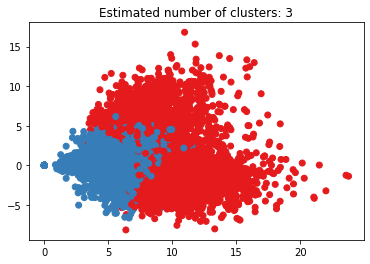

In [55]:
# Plotting KMeans
svd = TruncatedSVD(n_components = 2)
reduced_data = svd.fit_transform(X)
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=[plt.cm.Set1(float(i) /10) for i in clusters])
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

## DBSCAN

In [38]:
def get_cluster_colors(labs):
    colors = []
    for i in labs:
        if i == -1:
            colors.append((0, 0, 0, 1))
        else:
            colors.append(plt.cm.Set1(float(i)/10))
    return colors

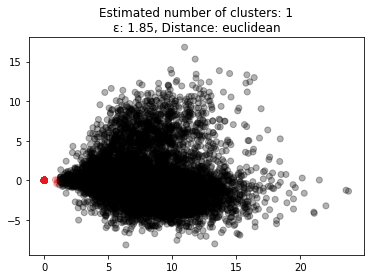

In [61]:
# Performing DBScan
dist = 'euclidean'
min_samples = 10
epsilon = 1.85
db = DBSCAN(eps=epsilon, min_samples= min_samples, metric=dist).fit(X)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
colors = get_cluster_colors(labels)
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=colors, alpha=0.3)
plt.title(f'Estimated number of clusters: {n_clusters_}\n\N{GREEK SMALL LETTER EPSILON}: {epsilon}, Distance: {dist}')
plt.show()

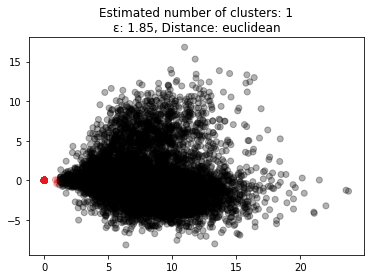

In [62]:
dist = 'euclidean'
min_samples = 5
epsilon = 1.85
db = DBSCAN(eps=epsilon, min_samples= min_samples, metric=dist).fit(X)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
colors = get_cluster_colors(labels)
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=colors, alpha=0.3)
plt.title(f'Estimated number of clusters: {n_clusters_}\n\N{GREEK SMALL LETTER EPSILON}: {epsilon}, Distance: {dist}')
plt.show()

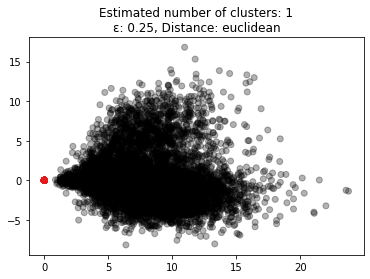

In [80]:
dist = 'euclidean'
min_samples = 5
epsilon = 0.25
db = DBSCAN(eps=epsilon, min_samples= min_samples, metric=dist).fit(X)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
colors = get_cluster_colors(labels)
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=colors, alpha=0.3)
plt.title(f'Estimated number of clusters: {n_clusters_}\n\N{GREEK SMALL LETTER EPSILON}: {epsilon}, Distance: {dist}')
plt.show()

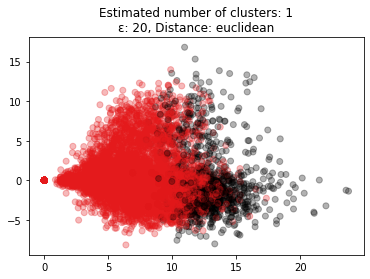

In [93]:
dist = 'euclidean'
min_samples = 10
epsilon = 20
db = DBSCAN(eps=epsilon, min_samples= min_samples, metric=dist).fit(X)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
colors = get_cluster_colors(labels)
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=colors, alpha=0.3)
plt.title(f'Estimated number of clusters: {n_clusters_}\n\N{GREEK SMALL LETTER EPSILON}: {epsilon}, Distance: {dist}')
plt.show()

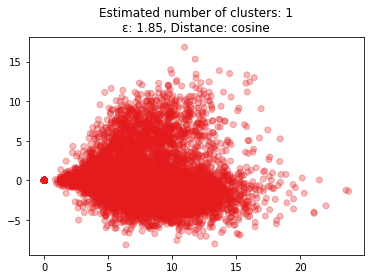

In [66]:
dist = 'cosine'
min_samples = 10
epsilon = 1.85
db = DBSCAN(eps=epsilon, min_samples= min_samples, metric=dist).fit(X)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
colors = get_cluster_colors(labels)
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=colors, alpha=0.3)
plt.title(f'Estimated number of clusters: {n_clusters_}\n\N{GREEK SMALL LETTER EPSILON}: {epsilon}, Distance: {dist}')
plt.show()

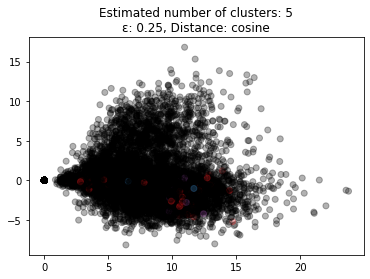

In [67]:
dist = 'cosine'
min_samples = 10
epsilon = 0.25
db = DBSCAN(eps=epsilon, min_samples= min_samples, metric=dist).fit(X)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
colors = get_cluster_colors(labels)
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=colors, alpha=0.3)
plt.title(f'Estimated number of clusters: {n_clusters_}\n\N{GREEK SMALL LETTER EPSILON}: {epsilon}, Distance: {dist}')
plt.show()

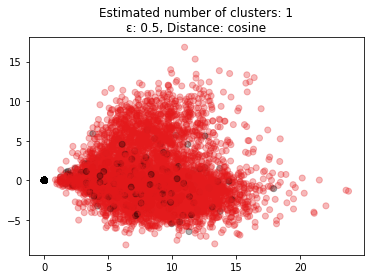

In [68]:
dist = 'cosine'
min_samples = 10
epsilon = 0.5
db = DBSCAN(eps=epsilon, min_samples= min_samples, metric=dist).fit(X)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
colors = get_cluster_colors(labels)
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=colors, alpha=0.3)
plt.title(f'Estimated number of clusters: {n_clusters_}\n\N{GREEK SMALL LETTER EPSILON}: {epsilon}, Distance: {dist}')
plt.show()

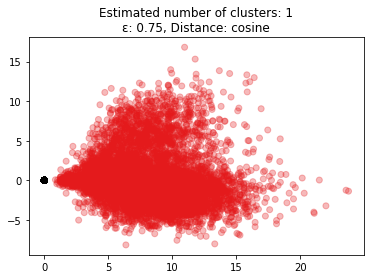

In [69]:
dist = 'cosine'
min_samples = 10
epsilon = 0.75
db = DBSCAN(eps=epsilon, min_samples= min_samples, metric=dist).fit(X)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
colors = get_cluster_colors(labels)
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=colors, alpha=0.3)
plt.title(f'Estimated number of clusters: {n_clusters_}\n\N{GREEK SMALL LETTER EPSILON}: {epsilon}, Distance: {dist}')
plt.show()

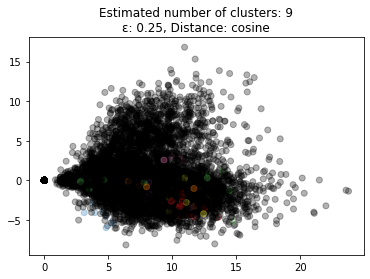

In [70]:
dist = 'cosine'
min_samples = 5
epsilon = 0.25
db = DBSCAN(eps=epsilon, min_samples= min_samples, metric=dist).fit(X)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
colors = get_cluster_colors(labels)
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=colors, alpha=0.3)
plt.title(f'Estimated number of clusters: {n_clusters_}\n\N{GREEK SMALL LETTER EPSILON}: {epsilon}, Distance: {dist}')
plt.show()

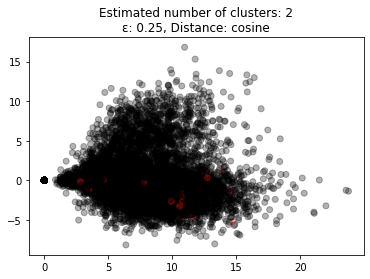

In [71]:
dist = 'cosine'
min_samples = 15
epsilon = 0.25
db = DBSCAN(eps=epsilon, min_samples= min_samples, metric=dist).fit(X)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
colors = get_cluster_colors(labels)
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=colors, alpha=0.3)
plt.title(f'Estimated number of clusters: {n_clusters_}\n\N{GREEK SMALL LETTER EPSILON}: {epsilon}, Distance: {dist}')
plt.show()

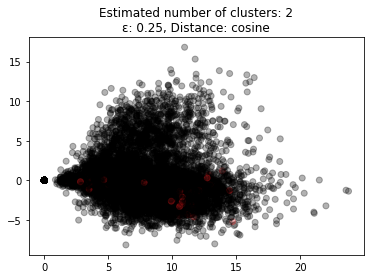

In [72]:
dist = 'cosine'
min_pts = 20
epsilon = 0.25
db = DBSCAN(eps=epsilon, min_samples= min_pts, metric=dist).fit(X)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
colors = get_cluster_colors(labels)
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=colors, alpha=0.3)
plt.title(f'Estimated number of clusters: {n_clusters_}\n\N{GREEK SMALL LETTER EPSILON}: {epsilon}, Distance: {dist}')
plt.show()

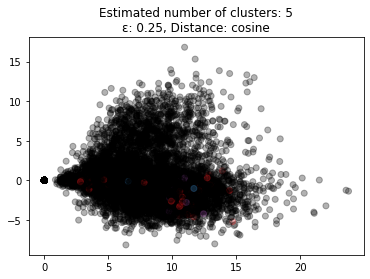

In [79]:
dist = 'cosine'
min_pts = 10
epsilon = 0.25
db = DBSCAN(eps=epsilon, min_samples= min_pts, metric=dist).fit(X)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
colors = get_cluster_colors(labels)
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=colors, alpha=0.3)
plt.title(f'Estimated number of clusters: {n_clusters_}\n\N{GREEK SMALL LETTER EPSILON}: {epsilon}, Distance: {dist}')
plt.show()

## Meanshift

## HDBSCAN

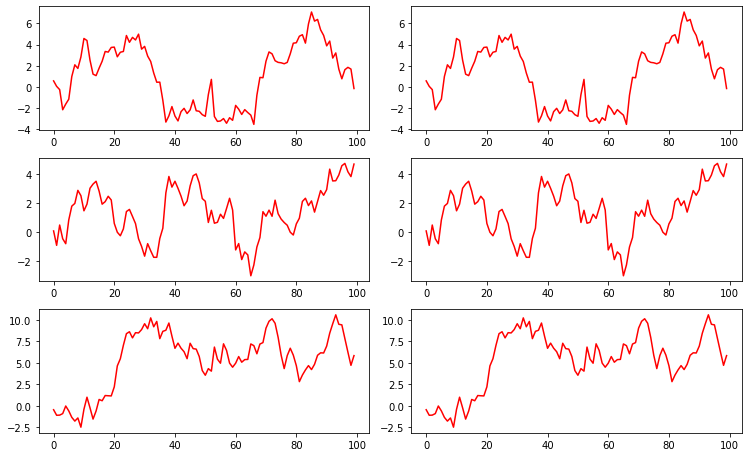

In [98]:

fig, axes = plt.subplots(3, 2)

""" Iterate column's axes"""
def iterate_columns(cols, x):
   for col in cols:
      col.plot(x, color='red')

""" Iterate row's axes"""
for row in axes:
   x = np.random.normal(0, 1, 100).cumsum()
   iterate_columns(row, x)

plt.show()